# **🏠 Airbnb Dynamic Pricing Recommendation Engine**

---



Name: Bishal Kumar Mishra

Created on: 21 December 2025

In this project, I analyze Airbnb listing data to understand how prices vary
based on different factors and give simple pricing recommendations.

Objective:

The main objective of this project is to analyze Airbnb prices
and create a simple pricing recommendation based on room type.


In [91]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Dataset Description:

The dataset contains Airbnb listings from New York.
It includes information like price, room type, location,
number of reviews, and availability.

In [92]:
# Load the Airbnb dataset
df = pd.read_csv("new_york_listings_2024.csv")

# View first 5 rows
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths
0,1312228,Rental unit in Brooklyn · ★5.0 · 1 bedroom,7130382,Walter,Brooklyn,Clinton Hill,40.683710,-73.964610,Private room,55.0,...,2015-12-20,0.03,1,0,0,No License,5.0,1,1,Not specified
1,45277537,Rental unit in New York · ★4.67 · 2 bedrooms ·...,51501835,Jeniffer,Manhattan,Hell's Kitchen,40.766610,-73.988100,Entire home/apt,144.0,...,2023-05-01,0.24,139,364,2,No License,4.67,2,1,1
2,971353993633883038,Rental unit in New York · ★4.17 · 1 bedroom · ...,528871354,Joshua,Manhattan,Chelsea,40.750764,-73.994605,Entire home/apt,187.0,...,2023-12-18,1.67,1,343,6,Exempt,4.17,1,2,1
3,3857863,Rental unit in New York · ★4.64 · 1 bedroom · ...,19902271,John And Catherine,Manhattan,Washington Heights,40.835600,-73.942500,Private room,120.0,...,2023-09-17,1.38,2,363,12,No License,4.64,1,1,1
4,40896611,Condo in New York · ★4.91 · Studio · 1 bed · 1...,61391963,Stay With Vibe,Manhattan,Murray Hill,40.751120,-73.978600,Entire home/apt,85.0,...,2023-12-03,0.24,133,335,3,No License,4.91,Studio,1,1


In [93]:
# Check number of rows and columns
df.shape

(20758, 22)

In [94]:
# View column names
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license', 'rating',
       'bedrooms', 'beds', 'baths'],
      dtype='object')

In [95]:
# Basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   name                            20758 non-null  object 
 2   host_id                         20758 non-null  int64  
 3   host_name                       20758 non-null  object 
 4   neighbourhood_group             20758 non-null  object 
 5   neighbourhood                   20758 non-null  object 
 6   latitude                        20758 non-null  float64
 7   longitude                       20758 non-null  float64
 8   room_type                       20758 non-null  object 
 9   price                           20758 non-null  float64
 10  minimum_nights                  20758 non-null  int64  
 11  number_of_reviews               20758 non-null  int64  
 12  last_review                     

Initial Observations:

The dataset contains multiple columns related to Airbnb listings.
The price column is the most important for this project.
Before analysis, the price column is checked for accuracy.

# *🧹 STEP 2 — PRICE CHECKING*


The price column is already in numeric format.
However, it is checked again to ensure there are no missing values.

In [96]:
# Check price values
df["price"].head()

,price
0,55.0
1,144.0
2,187.0
3,120.0
4,85.0


In [97]:
# Remove rows with missing price
df = df.dropna(subset=["price"])

# Dataset size after cleaning
df.shape

(20758, 22)

After checking the price column, rows with missing values are removed.
This helps keep the analysis accurate.

# *📊 STEP 3 — PRICE ANALYSIS*

In this step, I analyze Airbnb prices to understand pricing trends.
This includes average price and price distribution.

In [98]:
# Price statistics
df["price"].describe()

,price
count,20758.000000
mean,187.776616
std,1022.797208
min,10.000000
25%,80.000000
50%,125.000000
75%,199.000000
max,100000.000000


In [99]:
# Average price
df["price"].mean()

np.float64(187.77661624433952)

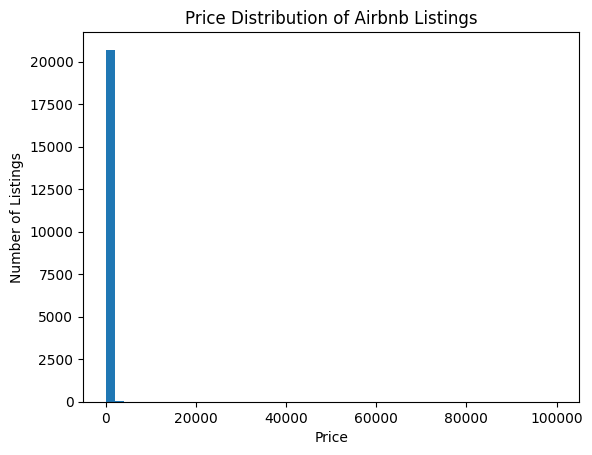

In [100]:
# Price distribution
plt.hist(df["price"], bins=50)
plt.title("Price Distribution of Airbnb Listings")
plt.xlabel("Price")
plt.ylabel("Number of Listings")
plt.show()

Most Airbnb listings are priced on the lower side.
Very high-priced listings are less common.

# *🏘️ STEP 4 — PRICE BY ROOM TYPE*

Room type plays an important role in pricing.
In this step, I analyze the average price based on room type.

In [101]:
# Average price by room type
room_price = df.groupby("room_type")["price"].mean().sort_values(ascending=False)
room_price

,price
room_type,
Hotel room,415.053571
Entire home/apt,223.160274
Shared room,156.286689
Private room,139.517378


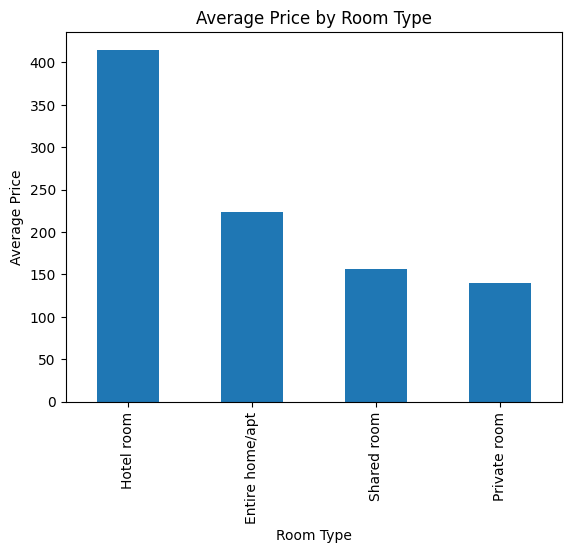

In [102]:
# Plot average price by room type
room_price.plot(kind="bar")
plt.title("Average Price by Room Type")
plt.xlabel("Room Type")
plt.ylabel("Average Price")
plt.show()

Entire homes are the most expensive.
Private rooms are moderately priced.
Shared rooms are the cheapest.

Room type is a key factor in pricing.

# *💡 STEP 5 — PRICING RECOMMENDATION*

Based on the analysis, a simple pricing recommendation logic is created.
The recommendation depends mainly on room type.

In [103]:
def recommend_price(row):
    if row["room_type"] == "Entire home/apt":
        return row["price"] * 1.10
    elif row["room_type"] == "Private room":
        return row["price"] * 1.05
    else:
        return row["price"] * 0.95

In [104]:
# Apply pricing recommendation
df["recommended_price"] = df.apply(recommend_price, axis=1)

df[["price", "room_type", "recommended_price"]].head()

,price,room_type,recommended_price
0,55.0,Private room,57.75
1,144.0,Entire home/apt,158.40
2,187.0,Entire home/apt,205.70
3,120.0,Private room,126.00
4,85.0,Entire home/apt,93.50


This project shows how Airbnb pricing trends can be analyzed using data.
The pricing recommendation engine provides simple price suggestions
based on room type.

This approach can help hosts make better pricing decisions.

Limitations:

This project uses a simple rule-based pricing method.
Real-world dynamic pricing would include more factors
such as demand, seasonality, and customer behavior.

# THANK YOU 😊